<a href="https://www.kaggle.com/code/noureldinraafat/companies-profit-4-regression-models-rmse-14918?scriptVersionId=166871753" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
companies = pd.read_csv("/kaggle/input/companies-profit/1000_Companies.csv")
print(companies.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [136]:
# Data Exploration

print(companies.describe())

print(companies.isna().any())

print(companies.isna().sum())

           R&D Spend  Administration  Marketing Spend         Profit
count    1000.000000     1000.000000      1000.000000    1000.000000
mean    81668.927200   122963.897612    226205.058419  119546.164656
std     46537.567891    12613.927535     91578.393542   42888.633848
min         0.000000    51283.140000         0.000000   14681.400000
25%     43084.500000   116640.684850    150969.584600   85943.198543
50%     79936.000000   122421.612150    224517.887350  117641.466300
75%    124565.500000   129139.118000    308189.808525  155577.107425
max    165349.200000   321652.140000    471784.100000  476485.430000
R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


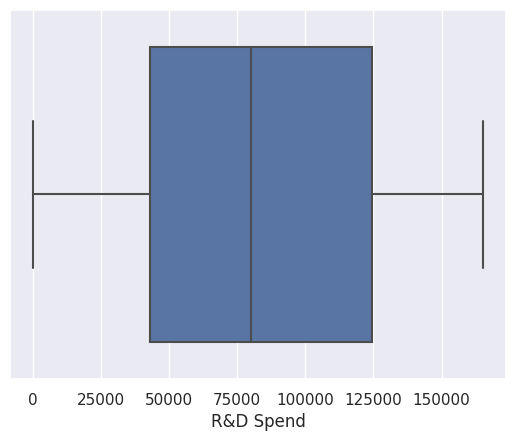

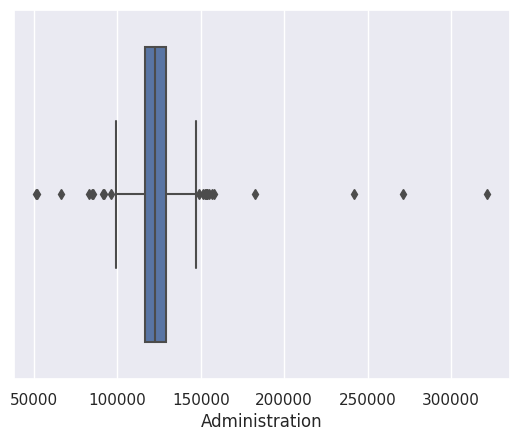

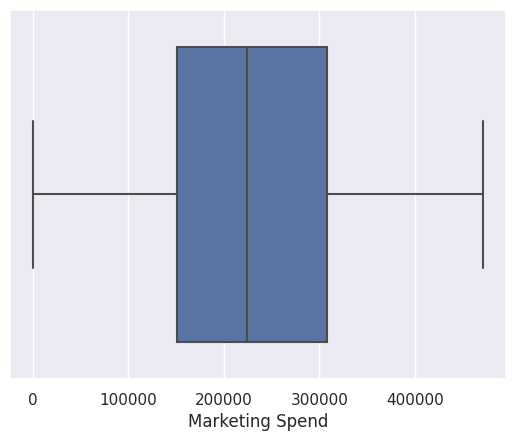

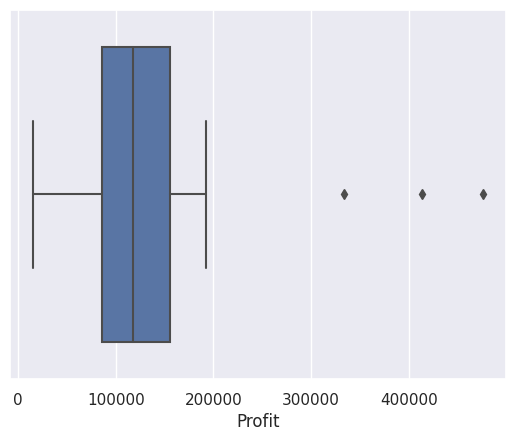

In [137]:
sns.set_theme()
sns.boxplot(data=companies, x="R&D Spend")
plt.show()

sns.boxplot(data=companies, x="Administration")
plt.show()

sns.boxplot(data=companies, x="Marketing Spend")
plt.show()

sns.boxplot(data=companies, x="Profit")
plt.show()

**Outliers Were detected in the Administration Column**

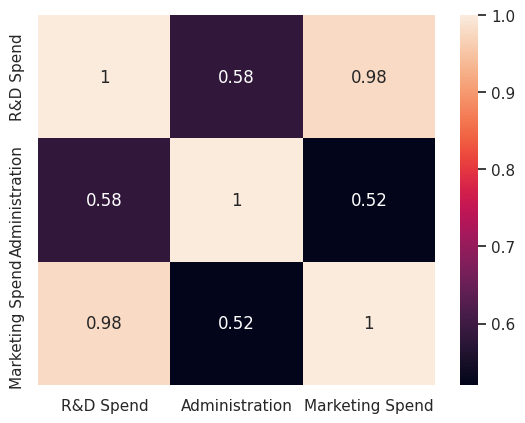

In [138]:
sns.heatmap(companies.drop(["State", "Profit"], axis=1).corr(), annot=True)
plt.show()

**significant correlation was detected between R&D Spend and Marketing Spend**

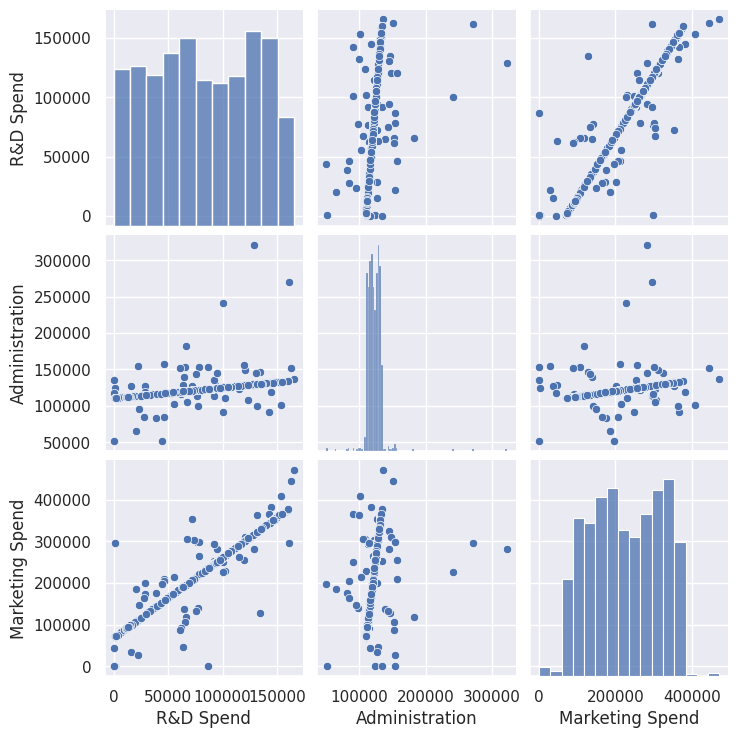

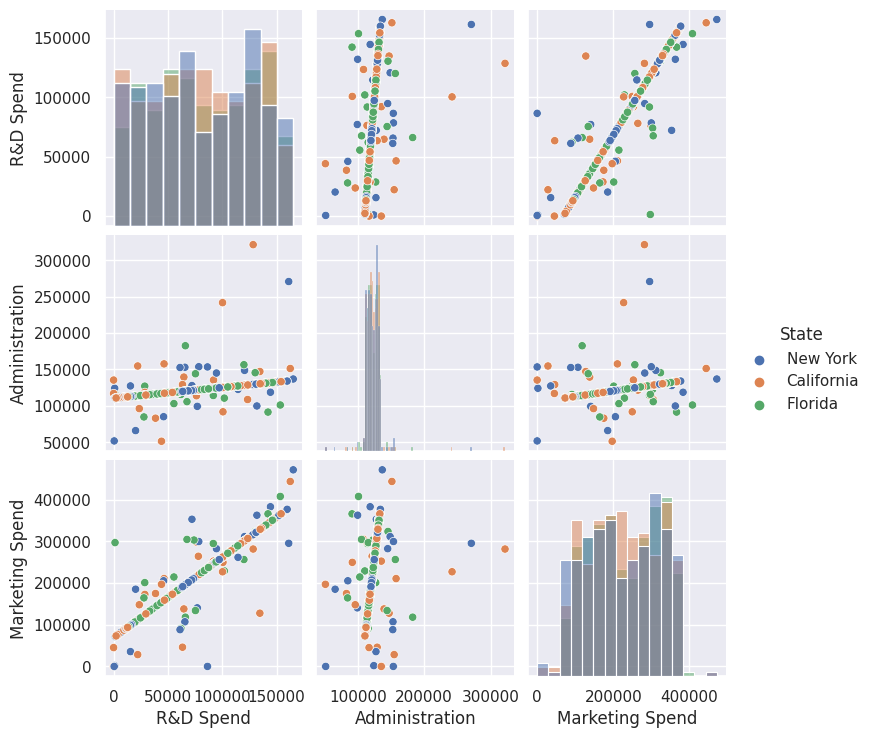

In [139]:
import warnings

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.pairplot(data=companies.drop(["Profit", "State"], axis=1), diag_kind="hist")
plt.show()

sns.pairplot(data=companies.drop(["Profit"], axis=1), diag_kind="hist", hue="State")
plt.show()

In [140]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Decision Tree Regressor

In [141]:
X = companies.drop(["Profit"], axis=1)
X = pd.get_dummies(X)
y = companies["Profit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

############################################################

# here we drop R&D Spend column
X = companies.drop(["Profit", "R&D Spend"], axis=1)
X = pd.get_dummies(X)
y = companies["Profit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE after dropping R&D Spend: {rmse}')

############################################################

# here we drop Marketing Spend column
X = companies.drop(["Profit", "Marketing Spend"], axis=1)
X = pd.get_dummies(X)
y = companies["Profit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE after dropping Marketing Spend: {rmse}')

RMSE: 10098.580845424527
RMSE after dropping R&D Spend: 9810.47197338182
RMSE after dropping Marketing Spend: 6009.939978110448


# Random Forest Regression

In [142]:
X = companies.drop(["Profit"], axis=1)
X = pd.get_dummies(X)
y = companies["Profit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

############################################################

# here we drop R&D Spend column
X = companies.drop(["Profit", "R&D Spend"], axis=1)
X = pd.get_dummies(X)
y = companies["Profit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE after dropping R&D Spend: {rmse}')

############################################################

# here we drop Marketing Spend column
X = companies.drop(["Profit", "Marketing Spend"], axis=1)
X = pd.get_dummies(X)
y = companies["Profit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE after dropping Marketing Spend: {rmse}')

RMSE: 4603.363752271089
RMSE after dropping R&D Spend: 6133.013941574187
RMSE after dropping Marketing Spend: 4346.179246334487


# Linear Regression

In [143]:
X = companies.drop(["Profit"], axis=1)
X = pd.get_dummies(X)
y = companies["Profit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

############################################################

# here we drop R&D Spend column
X = companies.drop(["Profit", "R&D Spend"], axis=1)
X = pd.get_dummies(X)
y = companies["Profit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE after dropping R&D Spend: {rmse}')

############################################################

# here we drop Marketing Spend column
X = companies.drop(["Profit", "Marketing Spend"], axis=1)
X = pd.get_dummies(X)
y = companies["Profit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE after dropping Marketing Spend: {rmse}')

RMSE: 5547.534845026326
RMSE after dropping R&D Spend: 7861.4111089125245
RMSE after dropping Marketing Spend: 5483.00645392672


*We've tried 3 models so far, and they ALL gave a performance with the Marketing Spend column being dropped Superior to that when it's kept, so we'll continue our work by using the dataframe with this column dropped!*

# KNN Regression

In [144]:
X = companies.drop(["Profit", "Marketing Spend"], axis=1)
X = pd.get_dummies(X)
y = companies["Profit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsRegressor()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE : {rmse}')

RMSE : 5697.816242066386


# **Now we'll compare the performance of the four models before and after scaling, and from now and on we'll use **5 fold cross validation****

In [145]:
from sklearn.model_selection import cross_val_score

X = companies.drop(["Profit", "Marketing Spend"], axis=1)
X = pd.get_dummies(X)
y = companies["Profit"]

models = [DecisionTreeRegressor(random_state=42), RandomForestRegressor(random_state=42), 
          LinearRegression(), KNeighborsRegressor()]
model_names = ["Decision Tree Regression", "Random Forest Regression", "Linear Regression", 
               "KNN Regression"]

print("Before Scaling:\n\n")

for i in range(len(models)):
    model = models[i]

    # Perform 5-fold cross-validation
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

    # Calculate the root mean squared error (RMSE)
    rmse = np.sqrt(-scores.mean())
    print("RMSE " + str(model_names[i])+": "+str(rmse))

Before Scaling:


RMSE Decision Tree Regression: 18412.454087751874
RMSE Random Forest Regression: 15543.96075776319
RMSE Linear Regression: 17290.53123257629
RMSE KNN Regression: 15115.935962321619


In [146]:
X = companies.drop(["Profit", "Marketing Spend"], axis=1)
y = companies["Profit"]

scaler = StandardScaler()

# apply scaler to the numerical columns
X_scaled = scaler.fit_transform(X[['R&D Spend', 'Administration']])

# add the scaled columns back to the original dataframe
X_scaled = pd.DataFrame(X_scaled, columns=['R&D Spend_scaled', 'Administration_scaled'])

# concatenate the scaled columns with the categorical columns
X = pd.concat([X_scaled, X[['State']]], axis=1)

X_encoded = pd.get_dummies(X, columns=['State'])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

models = [DecisionTreeRegressor(random_state=42), RandomForestRegressor(random_state=42), 
          LinearRegression(), KNeighborsRegressor()]
model_names = ["Decision Tree Regression", "Random Forest Regression", "Linear Regression"
               , "KNN Regression"]

print("After Scaling:\n\n")

for i in range(len(models)):
    model = models[i]

    # Perform 5-fold cross-validation
    scores = cross_val_score(model, X_encoded, y, cv=5, scoring='neg_mean_squared_error')

    # Calculate the root mean squared error (RMSE)
    rmse = np.sqrt(-scores.mean())
    print("RMSE " + str(model_names[i])+": "+str(rmse))

After Scaling:


RMSE Decision Tree Regression: 18412.454087751874
RMSE Random Forest Regression: 15543.960607036126
RMSE Linear Regression: 17290.53123257632
RMSE KNN Regression: 18343.038525517226


**before scaling it gave better performance**

# We'll optimize Random Forest, Linear Regression and KNN since they were superior to decision tree

# Now we'll do hyper-parameter optimization for the models

In [147]:
from sklearn.model_selection import RandomizedSearchCV

# we create a List of dictionaries that will later be converted to a DataFrame for comparing before and after optimization

models_scores = []

# Optimizing Random Forest

In [148]:
X = companies.drop(["Profit", "Marketing Spend"], axis=1)
X = pd.get_dummies(X)
y = companies["Profit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_dist = {
    'n_estimators': np.arange(10, 201, 10),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'min_weight_fraction_leaf': np.arange(0.0, 0.6, 0.1),
    'max_features': np.arange(1, X.shape[1]+1),
    'min_impurity_decrease': np.arange(0.0, 1.1, 0.1),
}

# Create the regressor
model = RandomForestRegressor(random_state=42)

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the root mean squared error (RMSE)
rmse_before_opt = int(np.sqrt(-scores.mean()))
print(f'RMSE Random Forest before optimization: {rmse_before_opt}')

# Define the RandomizedSearchCV object
rf_random = RandomizedSearchCV(model, param_dist, n_iter=100, scoring='neg_mean_squared_error', cv=5, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV object to the data
rf_random.fit(X_train, y_train)

# Get the optimized model
model = RandomForestRegressor(**rf_random.best_params_, random_state=42)

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the root mean squared error (RMSE)
rmse_after_opt = int(np.sqrt(-scores.mean()))
print(f'RMSE Random Forest after optimization: {rmse_after_opt}')

models_scores.append({"Model":"Random Forest", "Optimized":False, "RMSE":rmse_before_opt})
models_scores.append({"Model":"Random Forest", "Optimized":True, "RMSE":rmse_after_opt})

RMSE Random Forest before optimization: 15543
RMSE Random Forest after optimization: 15581


# Optimizing Linear Regression

In [149]:
X = companies.drop(["Profit", "Marketing Spend"], axis=1)
X = pd.get_dummies(X)
y = companies["Profit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_dist = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': np.arange(1, 4),
    'positive': [True, False],
}

# Perform 5-fold cross-validation
scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the root mean squared error (RMSE)
rmse_before_opt = int(np.sqrt(-scores.mean()))
print(f'RMSE Linear Regression before optimization: {rmse_before_opt}')

# Define the RandomizedSearchCV object
lr_random = RandomizedSearchCV(LinearRegression(), param_dist, n_iter=100, scoring='neg_mean_squared_error', cv=5, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV object to the data
lr_random.fit(X_train, y_train)

# Get the optimized model
model = LinearRegression(**lr_random.best_params_)

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the root mean squared error (RMSE)
rmse_after_opt = int(np.sqrt(-scores.mean()))
print(f'RMSE Linear Regression after optimization: {rmse_after_opt}')

models_scores.append({"Model":"Linear Regression", "Optimized":False, "RMSE":rmse_before_opt})
models_scores.append({"Model":"Linear Regression", "Optimized":True, "RMSE":rmse_after_opt})

RMSE Linear Regression before optimization: 17290


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RMSE Linear Regression after optimization: 17290


# Optimizing KNN

In [150]:
X = companies.drop(["Profit", "Marketing Spend"], axis=1)
X = pd.get_dummies(X)
y = companies["Profit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_dist = {
    'n_neighbors': np.arange(1, 11),
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': np.arange(1, 101),
    'p': np.arange(1, 6),
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
}

# Perform 5-fold cross-validation
scores = cross_val_score(KNeighborsRegressor(), X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the root mean squared error (RMSE)
rmse_before_opt = int(np.sqrt(-scores.mean()))
print(f'RMSE KNN before optimization: {rmse_before_opt}')

# Define the RandomizedSearchCV object
knn_random = RandomizedSearchCV(KNeighborsRegressor(), param_dist, n_iter=100, scoring='neg_mean_squared_error', cv=5, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV object to the data
knn_random.fit(X_train, y_train)

# Get the optimized model
model = KNeighborsRegressor(**knn_random.best_params_)

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the root mean squared error (RMSE)
rmse_after_opt = int(np.sqrt(-scores.mean()))
print(f'RMSE KNN after optimization: {rmse_after_opt}')

models_scores.append({"Model":"KNN", "Optimized":False, "RMSE":rmse_before_opt})
models_scores.append({"Model":"KNN", "Optimized":True, "RMSE":rmse_after_opt})

RMSE KNN before optimization: 15115
RMSE KNN after optimization: 14918


# Optimizing XGBoost Regression

In [151]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

X = companies.drop(["Profit", "Marketing Spend"], axis=1)
X = pd.get_dummies(X)
y = companies["Profit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_dist = {
    'max_depth': np.arange(3, 11),
    'learning_rate': np.arange(0.01, 0.2, 0.01),
    'n_estimators': np.arange(50, 501, 50),
    'gamma': np.arange(0, 0.2, 0.01),
    'min_child_weight': np.arange(1, 11),
    'subsample': np.arange(0.5, 1.0, 0.05),
    'colsample_bytree': np.arange(0.5, 1.0, 0.05),
}

# Create the regressor
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the root mean squared error (RMSE)
rmse_before_opt = int(np.sqrt(-scores.mean()))
print(f'RMSE XGBoost before optimization: {rmse_before_opt}')

# Define the RandomizedSearchCV object
xgb_random = RandomizedSearchCV(model, param_dist, n_iter=100, scoring='neg_mean_squared_error', cv=5, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV object to the data
xgb_random.fit(X_train, y_train)

# Get the optimized model
model = xgb.XGBRegressor(**xgb_random.best_params_, random_state=42)

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the root mean squared error (RMSE)
rmse_after_opt = int(np.sqrt(-scores.mean()))
print(f'RMSE XGBoost after optimization: {rmse_after_opt}')

models_scores.append({"Model":"XGBoost", "Optimized":False, "RMSE":rmse_before_opt})
models_scores.append({"Model":"XGBoost", "Optimized":True, "RMSE":rmse_after_opt})

RMSE XGBoost before optimization: 23062
RMSE XGBoost after optimization: 22842


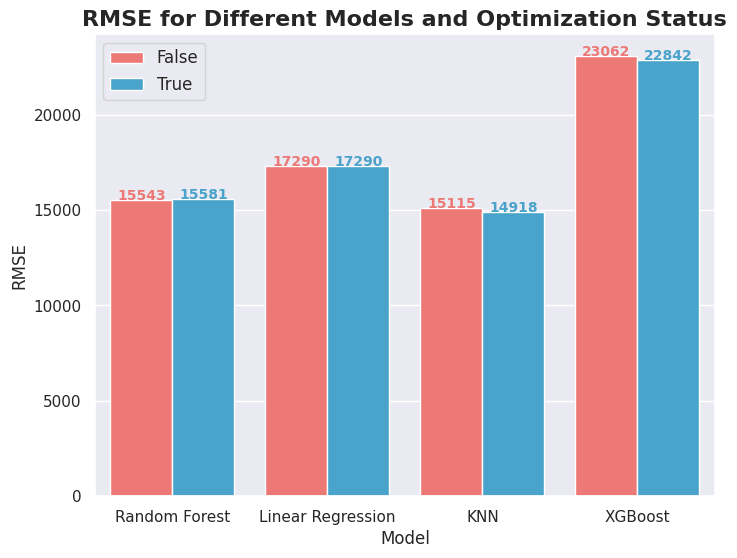

In [152]:
import matplotlib.colors as mcolors

models_scores = pd.DataFrame(models_scores)

# Define a custom color palette
custom_palette = ['#FF6663', '#34ACE0']

# Create a new figure
fig, ax = plt.subplots(figsize=(8, 6))

# Create a bar plot with hue as the optimized column
sns.barplot(x='Model', y='RMSE', hue='Optimized', data=models_scores, palette=custom_palette, ax=ax)

# Add RMSE values to the bars with colored text
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    rgb = mcolors.to_rgb(bar.get_facecolor())
    ax.text(bar.get_x() + bar.get_width() / 2, height + 3, int(height), ha="center", color=rgb, fontsize=10, weight='bold')

# Set plot title and labels
plt.title("RMSE for Different Models and Optimization Status", fontsize=16, fontweight="bold")
plt.xlabel("Model", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.legend(fontsize=12)

# Show the plot
plt.show()

# *Our WINNER is Optimized KNN with **14918** RMSE*